In [3]:
# PIL(Pillow)플 이용한 image 처리
from PIL import Image

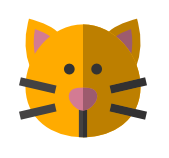

In [4]:
# imamge 불러오기
cat = Image.open("../Data/cat.png")
cat

In [5]:
# Image 층(Layer) 확인
cat.getbands()

('R', 'G', 'B')

In [6]:
# # Modes
# - L : black and white
# - RGB : True Color
# - RGBA : True Color with 투명도
# - YCbCr : Video

In [7]:
# mode 확인
cat.mode

'RGB'

In [8]:
# Size
cat.size

(169, 158)

In [9]:
#File name
cat.filename


'C:\\syk\\01Deep\\Data\\cat.png'

In [10]:
# File Format

cat.format

'PNG'

In [11]:
# Convert to JPEG
cat.save("../Data/cat1.jpg")

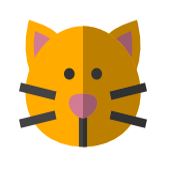

In [12]:
# Image Resize
cat_resize = cat.resize((169,169))
cat_resize

In [15]:
# # Thumbnail 만들기
# - 가로와 세로의 크기를 반으로 줄인다.
# - 반으로 줄이면 실수(Raal Number)가 발생할 수 있어 소수점 이하 truncate
import math
math.trunc(cat.size[0]/2)

84

In [25]:
# Thumbnail 만들기
size = math.trunc(cat.size[0]/2), math.trunc(cat.size[1]/2)
size

(84, 79)

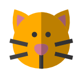

In [24]:
catThumb = cat.copy()
catThumb.thumbnail(size)
catThumb.save("../Data/thumb.png")
catThumb

In [23]:
# Image Manipulation > 이거 왜해 > 실제데이터 만들수 있다
# Image Crop
# 이미지 크기
print('전체크기: ', cat.size)
print('가로 크기:', cat.width)
print('세로 크기:', cat.height)

전체크기:  (169, 158)
가로 크기: 169
세로 크기: 158


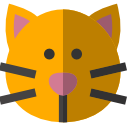

In [26]:
box = (20, 15, 147, 140)  # x좌표, y좌표, x크리, y크리
catCrop = cat.crop(box)
catCrop

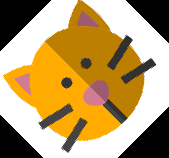

In [13]:
# Image Rotation
catRotate = cat.rotate(45)    # 패딩값은 다 0값이다
catRotate

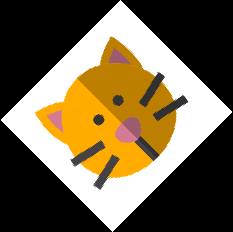

In [14]:
catRotate = cat.rotate(45, expand=True)
catRotate

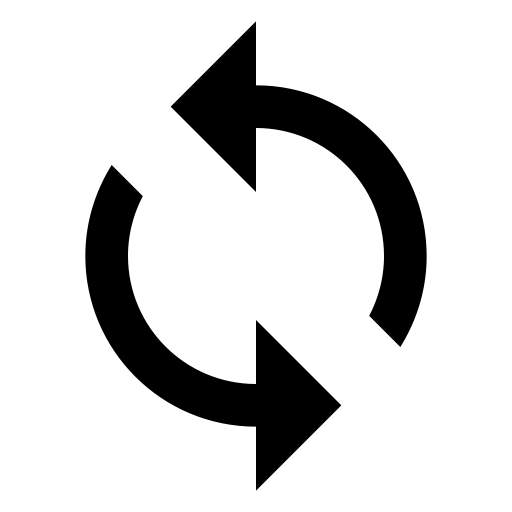

In [29]:
# Image Merge
record = Image.open("../Data/record.png")
record



In [30]:
# mode 확인
record.mode

'RGBA'

In [31]:
# 크기확인
record.size

(512, 512)

In [32]:
# 이미지의 크기가 cat보다 커서 줄이자
# 1/10 크리를 줄여서 recordThumb를 만들자
# math.trunc(recode.size[0]/10)
size = math.trunc(record.size[0]/10), math.trunc(record.size[1]/10)


In [33]:
size

(51, 51)

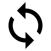

In [35]:
# Thumbnail 만들기
recordThumb = record.copy()
recordThumb.thumbnail(size)
recordThumb.save("../Data/thumb.png")
recordThumb

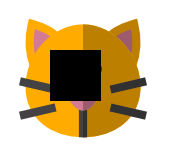

In [18]:
# cat Image(169,158)위에 recordThumb를 배치
position = (50, 50)
catMerge = cat.copy()
catMerge.paste(recordThumb, position)
catMerge

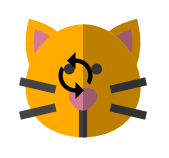

In [19]:
# recordThumb의 배경색 투명(검은색) 이미지도 검은색
#   검은색 투명도 제거 필요
position = (50, 50)
catMerge = cat.copy()
catMerge.paste(recordThumb, position, recordThumb)  # 배열의 덧셈  0+0 
catMerge

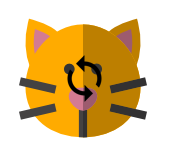

In [20]:
# Center에 배치
position = (math.trunc((cat.width-recordThumb.width)/2)), (math.trunc((cat.height-recordThumb.height)/2))
catMerge = cat.copy()
catMerge.paste(recordThumb, position, recordThumb)  # 배열의 덧셈  0+0 
catMerge


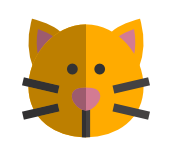

In [21]:
# Image Flip  반전
catFlip = cat.copy()
catFlip.transpose(Image.Transpose.FLIP_LEFT_RIGHT)


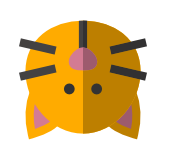

In [23]:
# Image Flip  상하반전
catFlip = cat.copy()
catFlip.transpose(Image.Transpose.FLIP_TOP_BOTTOM)

In [24]:
# PIL image to Numpy
import numpy as np
cat_array = np.array(cat)
cat_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [27]:
img = Image.fromarray(cat_array, 'RGB')
img.save("../Data/cat_array.png")
img.show()

In [ ]:
# 특정 pixel의 RGB값 확인
cat.getpixel((70,70))

(51, 51, 51)

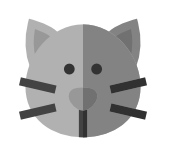

In [ ]:
#Color Transformation
# Gray Color
cat.convert('L')


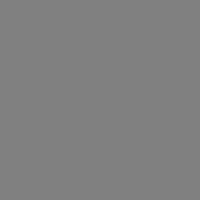

In [31]:
# Draw on Image
from PIL import ImageDraw
image = Image.new(
    'RGB',
    (200,200),
    (128,128,128),
)
image

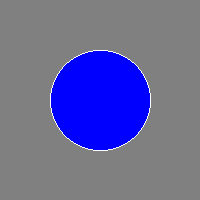

In [38]:
draw = ImageDraw.Draw(image)
# Circle
draw.ellipse(
    (50, 50, 150, 150),
    fill=(0,0,255),
    outline=(255,255,255)
)
image

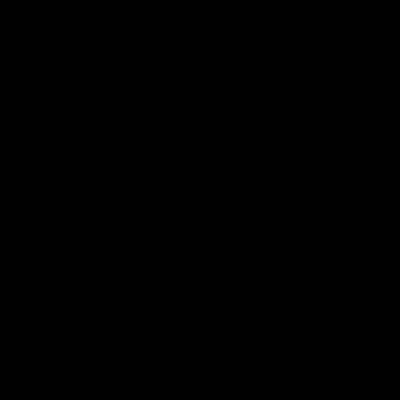

In [40]:
image = Image.new('RGB',(400,400))
image

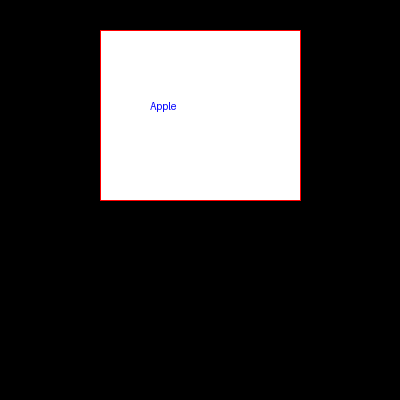

In [44]:
image_draw = ImageDraw.Draw(image)
image_draw.rectangle(
    (100,30,300,200),
    fill='white',
    outline='red'
)
image
image_draw.text(
    (150,100),
    "Apple",
    fill= 'blue'
)
image

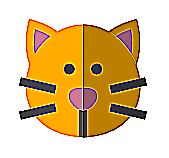

In [50]:
# Image Enhancement
from PIL import ImageEnhance
# image sharpness
enhancer = ImageEnhance.Sharpness(cat)
enhancer.enhance(20)
                

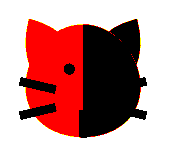

In [55]:
# image contrast
enhancer = ImageEnhance.Contrast(cat)
enhancer.enhance(50)

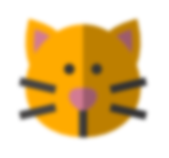

In [58]:
# Filters
from PIL import ImageFilter
# Blur
cat.filter(ImageFilter.GaussianBlur)

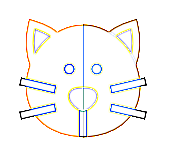

In [ ]:
# Contour
cat.filter(ImageFilter.CONTOUR)  # 에지값만 가져온다

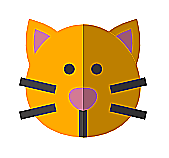

In [60]:
# Edge Enhence
cat.filter(ImageFilter.EDGE_ENHANCE)

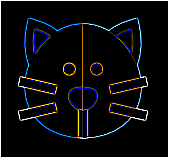

In [61]:
# Find Edge
cat.filter(ImageFilter.FIND_EDGES)

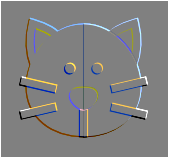

In [62]:
# Emboss
cat.filter(ImageFilter.EMBOSS)

In [63]:
# Animated GIF분리하기
from PIL import ImageSequence

In [ ]:
switch = Image.open("../Data/switch.gif")

In [67]:
frame_num = 1
for frame in ImageSequence.Iterator(switch):
    frame.save("../Data/switch/switch_%02d.png"%frame_num)
    frame_num+=1
    if frame_num == 13:
        break
    